# Fake News Detection Using Machine Learning Algorithm And Comparitive analysis of Algorithms by Preformance Metrices.

In [2]:
import pandas as pd
import numpy as np
import itertools
import random
random.seed(123)

Importing Dataset

In [3]:
df = pd.read_csv("NewsData.csv")

In [4]:
df.head()

,id,title,text,label
0,1,2017 Pulitzer Prize Winners - The New York Times,The Pulitzer Prizes awarded Monday encompassed...,REAL
1,2,Palin's endorsement fails to excite Trump rall...,"NORWALK, Iowa (Reuters) - When it comes to inf...",REAL
2,3,Interior Department watchdog to investigate th...,WASHINGTON (Reuters) - The Interior Department...,REAL
3,4,SORE LOSER MICHAEL MOORE Calls On “Comrades” T...,Disrupt the Inauguration. The Majority have s...,FAKE
4,5,Austria's conservatives reach coalition deal w...,VIENNA (Reuters) - Austria s conservative Peop...,REAL


In [5]:
df.shape

(66536, 4)

In [6]:
counts = pd.value_counts(df.label)

In [7]:
counts

REAL    36416
FAKE    30120
Name: label, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66536 entries, 0 to 66535
Data columns (total 4 columns):
id       66536 non-null int64
title    66535 non-null object
text     66490 non-null object
label    66536 non-null object
dtypes: int64(1), object(3)
memory usage: 2.0+ MB


In [9]:
df.isnull().sum()

id        0
title     1
text     46
label     0
dtype: int64

In [10]:
labels = df.label

In [11]:
df = df.dropna()

In [12]:
df.shape

(66489, 4)

In [13]:
labels.head()

0    REAL
1    REAL
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [14]:
labels_length = len(df['label'])
labels_length

66489

In [15]:
text_length = len(df['text'])
text_length

66489

Mapping REAL to 1 and Fake to 0

In [16]:
df['label'] = df['label'].map({'REAL':1 ,'FAKE':0})

In [17]:
df.head()

,id,title,text,label
0,1,2017 Pulitzer Prize Winners - The New York Times,The Pulitzer Prizes awarded Monday encompassed...,1
1,2,Palin's endorsement fails to excite Trump rall...,"NORWALK, Iowa (Reuters) - When it comes to inf...",1
2,3,Interior Department watchdog to investigate th...,WASHINGTON (Reuters) - The Interior Department...,1
3,4,SORE LOSER MICHAEL MOORE Calls On “Comrades” T...,Disrupt the Inauguration. The Majority have s...,0
4,5,Austria's conservatives reach coalition deal w...,VIENNA (Reuters) - Austria s conservative Peop...,1


Splitting it into Training and Testing Dataset

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, x_test, y_train, y_test =  train_test_split(df['text'], df['label'], test_size=0.2, random_state = 20)

In [20]:
X_train.head()

30672    Pussy Riot Released The Perfect Nasty Woman’s ...
2519     The social justice warriors are being terroriz...
56288    Hillary Clinton is reportedly in the process o...
10345    Just in case you needed any more proof that Do...
6299     ISTANBUL (Reuters) - The U.S. ambassador to Tu...
Name: text, dtype: object

In [21]:
X_train.shape

(53191,)

In [22]:
x_test.shape

(13298,)

In [23]:
y_train.shape

(53191,)

In [24]:
y_test.shape

(13298,)

In [25]:
X_train.head()

30672    Pussy Riot Released The Perfect Nasty Woman’s ...
2519     The social justice warriors are being terroriz...
56288    Hillary Clinton is reportedly in the process o...
10345    Just in case you needed any more proof that Do...
6299     ISTANBUL (Reuters) - The U.S. ambassador to Tu...
Name: text, dtype: object

In [26]:
x_test.head()

55938    How can my team make the N. F. L. playoffs? It...
21391    ATLANTA  —   The most arresting vista in town ...
34933    WASHINGTON (Reuters) - The U.S. Justice Depart...
7671     BEIJING (Reuters) - China on Wednesday urged p...
43827    President Donald Trump has scheduled five call...
Name: text, dtype: object

In [27]:
# count the number of 'REAL' and 'FAKE' values in y_train
y_train_counts = pd.value_counts(y_train)

# count the number of 'REAL' and 'FAKE' values in y_test
y_test_counts = pd.value_counts(y_test)

# print the counts
print("y_train counts:\n", y_train_counts)
print("y_test counts:\n", y_test_counts)

y_train counts:
 1    29085
0    24106
Name: label, dtype: int64
y_test counts:
 1    7331
0    5967
Name: label, dtype: int64


Getting the Test Dataset

In [30]:
testDataSet = pd.concat([x_test, y_test], axis=1)

In [31]:
testDataSet

,text,label
55938,How can my team make the N. F. L. playoffs? It...,1
21391,ATLANTA — The most arresting vista in town ...,1
34933,WASHINGTON (Reuters) - The U.S. Justice Depart...,1
7671,BEIJING (Reuters) - China on Wednesday urged p...,1
43827,President Donald Trump has scheduled five call...,1
35613,NEW YORK (Reuters) - Would-be presidential ass...,1
24654,WASHINGTON (Reuters) - U.S. Democratic lawmake...,1
32132,Senator Elizabeth Warren continued her crusade...,0
9682,The nicest thing I own is the first thing you ...,1
65083,ISTANBUL (Reuters) - Turkey s foreign ministry...,1


In [32]:
testDataSet.to_csv('Test_DataSet_File.csv', index=False)

TF-IDF Vectorizer

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer(stop_words = 'english', max_df=0.7)

In [50]:
tf_train = vector.fit_transform(X_train)
tf_test = vector.transform(x_test)

TF-IDF-Passive Aggressive Algorithm

In [51]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tf_train, y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [53]:
y_pred_PR = pac.predict(tf_test)
score_PR_Tf = accuracy_score(y_test, y_pred_PR)

In [54]:
print(f"Accuracy Score PR using TF-IDF : {round(score_PR_Tf*100,2)}%")

Accuracy Score PR using TF-IDF : 90.43%


In [55]:
cfMatrix_PR_Tf = confusion_matrix(y_test, y_pred_PR)
cfMatrix_PR_Tf

array([[5286,  681],
       [ 591, 6740]], dtype=int64)

In [56]:
tn, fp, fn, tp = cfMatrix_PR_Tf.ravel() 
tn, fp, fn, tp

(5286, 681, 591, 6740)

Text(33.0, 0.5, 'True Label')

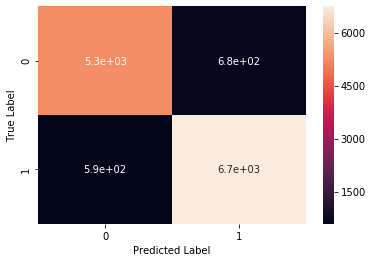

In [57]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.heatmap(cfMatrix_PR_Tf, annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
#fake =0, Real =1  Yaxis = TRUE VAL  Xaxis = PRED VAL  Order = TN, FP, FN, TP

TF-IDF-Linear Regression

In [58]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
LR_model.fit(tf_train, y_train)

C:\Users\BAASHITH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
y_pred_LR = LR_model.predict(tf_test)
score_LR_Tf = accuracy_score(y_test, y_pred_LR)

In [60]:
print(f"Accuracy Score LR : {round(score_LR_Tf*100,2)}%")

Accuracy Score LR : 91.71%


In [61]:
cfMatrix_LR_Tf = confusion_matrix(y_test, y_pred_LR)
cfMatrix_LR_Tf

array([[5396,  571],
       [ 532, 6799]], dtype=int64)

In [62]:
tn, fp, fn, tp = cfMatrix_LR_Tf.ravel() 
tn, fp, fn, tp

(5396, 571, 532, 6799)

Text(33.0, 0.5, 'True Label')

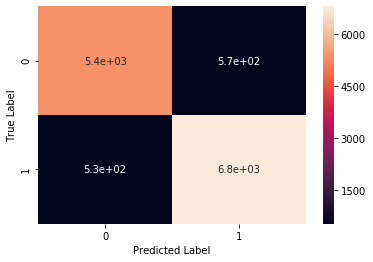

In [63]:
import seaborn as sns
sns.heatmap(cfMatrix_LR_Tf, annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
#fake =0, Real =1  Yaxis = TRUE VAL  Xaxis = PRED VAL  Order = TN, FP, FN, TP

TF-IDF-Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)
rf_model.fit(tf_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [65]:
y_pred_RF = rf_model.predict(tf_test)
score_RF_Tf = accuracy_score(y_test, y_pred_RF)

In [66]:
print(f"Accuracy Score RF using TF-IDF : {round(score_RF_Tf*100,2)}%")

Accuracy Score RF using TF-IDF : 88.7%


In [67]:
cfMatrix_RF_Tf = confusion_matrix(y_test, y_pred_RF)
cfMatrix_RF_Tf

array([[5081,  886],
       [ 617, 6714]], dtype=int64)

In [68]:
tn, fp, fn, tp = cfMatrix_RF_Tf.ravel() 
tn, fp, fn, tp

(5081, 886, 617, 6714)

Text(33.0, 0.5, 'True Label')

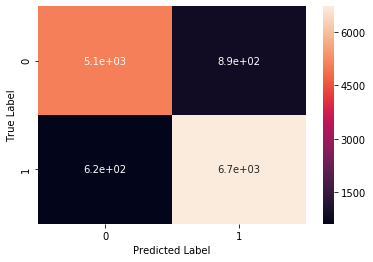

In [69]:
import seaborn as sns
sns.heatmap(cfMatrix_RF_Tf, annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
#fake =0, Real =1  Yaxis = TRUE VAL  Xaxis = PRED VAL  Order = TN, FP, FN, TP

TF-IDF-Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion ='entropy', random_state=0)
DT_model.fit(tf_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [71]:
y_pred_DT = DT_model.predict(tf_test)
score_DT_Tf = accuracy_score(y_test, y_pred_DT)

In [72]:
print(f"Accuracy Score DT using TF-IDF : {round(score_DT_Tf*100,2)}%")

Accuracy Score DT using TF-IDF : 86.38%


In [73]:
cfMatrix_DT_Tf = confusion_matrix(y_test, y_pred_DT)
cfMatrix_DT_Tf

array([[5104,  863],
       [ 948, 6383]], dtype=int64)

In [74]:
tn, fp, fn, tp = cfMatrix_DT_Tf.ravel() 
tn, fp, fn, tp

(5104, 863, 948, 6383)

Text(33.0, 0.5, 'True Label')

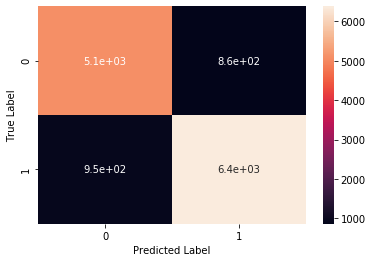

In [75]:
import seaborn as sns
sns.heatmap(cfMatrix_DT_Tf, annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
#fake =0, Real =1  Yaxis = TRUE VAL  Xaxis = PRED VAL  Order = TN, FP, FN, TP

TF-IDF-Linear SVC

In [76]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(tf_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [77]:
y_pred_SVM = svm_model.predict(tf_test)
score_SVM_Tf = accuracy_score(y_test, y_pred_SVM)

In [78]:
print(f"Accuracy Score SVM using TF-IDF : {round(score_SVM_Tf*100,2)}%")

Accuracy Score SVM using TF-IDF : 92.22%


In [79]:
cfMatrix_SVM_Tf = confusion_matrix(y_test, y_pred_SVM)
cfMatrix_SVM_Tf

array([[5415,  552],
       [ 483, 6848]], dtype=int64)

In [80]:
tn, fp, fn, tp = cfMatrix_SVM_Tf.ravel() 
tn, fp, fn, tp

(5415, 552, 483, 6848)

Text(33.0, 0.5, 'True Label')

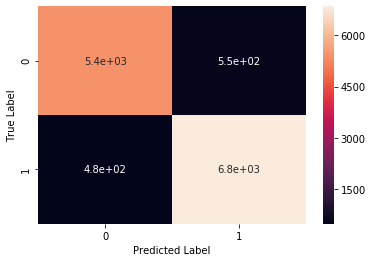

In [81]:
import seaborn as sns
sns.heatmap(cfMatrix_SVM_Tf, annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
#fake =0, Real =1  Yaxis = TRUE VAL  Xaxis = PRED VAL  Order = TN, FP, FN, TP

In [82]:
print(f"Accuracy Score PR : {round(score_PR_Tf*100,2)}%")
print(f"Accuracy Score LR : {round(score_LR_Tf*100,2)}%")
print(f"Accuracy Score RF : {round(score_RF_Tf*100,2)}%")
print(f"Accuracy Score DT : {round(score_DT_Tf*100,2)}%")
print(f"Accuracy Score SVM : {round(score_SVM_Tf*100,2)}%")

Accuracy Score PR : 90.43%
Accuracy Score LR : 91.71%
Accuracy Score RF : 88.7%
Accuracy Score DT : 86.38%
Accuracy Score SVM : 92.22%


Count Vectorizer

In [83]:
from sklearn.feature_extraction.text import CountVectorizer
C_Vector = CountVectorizer()

In [84]:
count_train = C_Vector.fit_transform(X_train)
count_test = C_Vector.transform(x_test)

Count-Passive Aggressive

In [85]:
pac_count = PassiveAggressiveClassifier(max_iter=50)
pac_count.fit(count_train, y_train)

C:\Users\BAASHITH\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [86]:
y_pred_PR_count = pac_count.predict(count_test)
score_PR_count = accuracy_score(y_test, y_pred_PR_count)

In [87]:
print(f"Accuracy Score PR_count : {round(score_PR_count*100,2)}%")

Accuracy Score PR_count : 89.12%


In [88]:
cfMatrix_PR_count = confusion_matrix(y_test, y_pred_PR_count)
cfMatrix_PR_count

array([[5518,  449],
       [ 998, 6333]], dtype=int64)

In [89]:
tn, fp, fn, tp = cfMatrix_PR_count.ravel() 
tn, fp, fn, tp

(5518, 449, 998, 6333)

Text(33.0, 0.5, 'True Label')

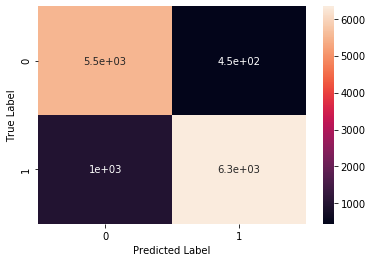

In [90]:
import seaborn as sns
sns.heatmap(cfMatrix_PR_count, annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
#fake =0, Real =1  Yaxis = TRUE VAL  Xaxis = PRED VAL  Order = TN, FP, FN, TP

Count-Linear Regression

In [91]:
from sklearn.linear_model import LogisticRegression
LR_model_count = LogisticRegression()
LR_model_count.fit(count_train, y_train)

C:\Users\BAASHITH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BAASHITH\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
y_pred_LR_count = LR_model_count.predict(count_test)
score_LR_count = accuracy_score(y_test, y_pred_LR_count)

In [93]:
print(f"Accuracy Score LR_count : {round(score_LR_count*100,2)}%")

Accuracy Score LR_count : 92.03%


In [94]:
cfMatrix_LR_count = confusion_matrix(y_test, y_pred_LR_count)
cfMatrix_LR_count

array([[5460,  507],
       [ 553, 6778]], dtype=int64)

In [95]:
tn, fp, fn, tp = cfMatrix_LR_count.ravel() 
tn, fp, fn, tp

(5460, 507, 553, 6778)

Text(33.0, 0.5, 'True Label')

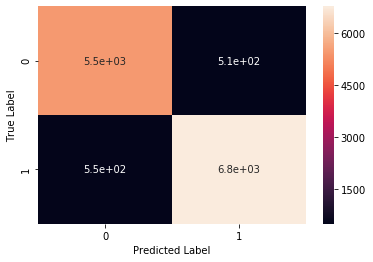

In [96]:
import seaborn as sns
sns.heatmap(cfMatrix_LR_count, annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
#fake =0, Real =1  Yaxis = TRUE VAL  Xaxis = PRED VAL  Order = TN, FP, FN, TP

Count-Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier
rf_model_count = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)
rf_model_count.fit(count_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [98]:
y_pred_RF_count = rf_model_count.predict(count_test)
score_RF_count = accuracy_score(y_test, y_pred_RF_count)

In [99]:
print(f"Accuracy Score RF_count : {round(score_RF_count*100,2)}%")

Accuracy Score RF_count : 89.06%


In [100]:
cfMatrix_RF_count = confusion_matrix(y_test, y_pred_RF_count)
cfMatrix_RF_count

array([[5060,  907],
       [ 548, 6783]], dtype=int64)

In [101]:
tn, fp, fn, tp = cfMatrix_RF_count.ravel() 
tn, fp, fn, tp

(5060, 907, 548, 6783)

Text(33.0, 0.5, 'True Label')

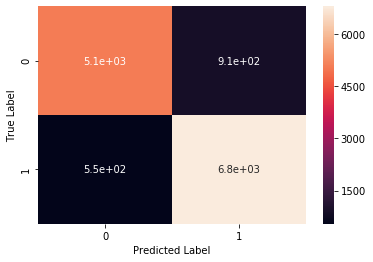

In [102]:
import seaborn as sns
sns.heatmap(cfMatrix_RF_count, annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
#fake =0, Real =1  Yaxis = TRUE VAL  Xaxis = PRED VAL  Order = TN, FP, FN, TP

Count-Decision Tree

In [103]:
from sklearn.tree import DecisionTreeClassifier
DT_model_count = DecisionTreeClassifier(criterion ='entropy', random_state=0)
DT_model_count.fit(count_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [104]:
y_pred_DT_count = DT_model_count.predict(count_test)
score_DT_count = accuracy_score(y_test, y_pred_DT_count)

In [105]:
print(f"Accuracy Score DT_count : {round(score_DT_count*100,2)}%")

Accuracy Score DT_count : 88.69%


In [106]:
cfMatrix_DT_count = confusion_matrix(y_test, y_pred_DT_count)
cfMatrix_DT_count

array([[5233,  734],
       [ 770, 6561]], dtype=int64)

In [107]:
tn, fp, fn, tp = cfMatrix_DT_count.ravel() 
tn, fp, fn, tp

(5233, 734, 770, 6561)

Text(33.0, 0.5, 'True Label')

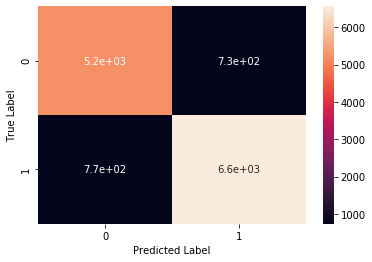

In [108]:
import seaborn as sns
sns.heatmap(cfMatrix_DT_count, annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
#fake =0, Real =1  Yaxis = TRUE VAL  Xaxis = PRED VAL  Order = TN, FP, FN, TP

Count-Linear SVC

In [109]:
from sklearn.svm import LinearSVC
svm_model_count = LinearSVC()
svm_model_count.fit(count_train,y_train)

C:\Users\BAASHITH\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [110]:
y_pred_SVM_count = svm_model_count.predict(count_test)
score_SVM_count = accuracy_score(y_test, y_pred_SVM_count)

In [111]:
print(f"Accuracy Score SVM_count : {round(score_SVM_count*100,2)}%")

Accuracy Score SVM_count : 90.01%


In [112]:
cfMatrix_SVM_count = confusion_matrix(y_test, y_pred_SVM_count)
cfMatrix_SVM_count

array([[5282,  685],
       [ 644, 6687]], dtype=int64)

In [113]:
tn, fp, fn, tp = cfMatrix_SVM_count.ravel() 
tn, fp, fn, tp

(5282, 685, 644, 6687)

Text(33.0, 0.5, 'True Label')

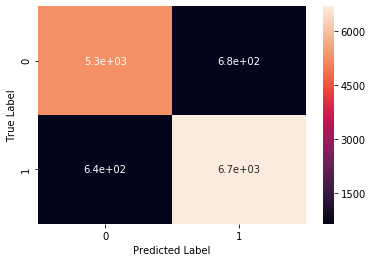

In [114]:
import seaborn as sns
sns.heatmap(cfMatrix_SVM_count, annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
#fake =0, Real =1  Yaxis = TRUE VAL  Xaxis = PRED VAL  Order = TN, FP, FN, TP

In [115]:
print(f"Accuracy Score PR_count : {round(score_PR_count*100,2)}%")
print(f"Accuracy Score LR_count : {round(score_LR_count*100,2)}%")
print(f"Accuracy Score RF_count : {round(score_RF_count*100,2)}%")
print(f"Accuracy Score DT_count : {round(score_DT_count*100,2)}%")
print(f"Accuracy Score SVM_count : {round(score_SVM_count*100,2)}%")

Accuracy Score PR_count : 89.12%
Accuracy Score LR_count : 92.03%
Accuracy Score RF_count : 89.06%
Accuracy Score DT_count : 88.69%
Accuracy Score SVM_count : 90.01%


In [116]:
print(f"Accuracy Score PR_TF : {round(score_PR_Tf*100,2)}%")
print(f"Accuracy Score LR_TF : {round(score_LR_Tf*100,2)}%")
print(f"Accuracy Score RF_TF : {round(score_RF_Tf*100,2)}%")
print(f"Accuracy Score DT_TF : {round(score_DT_Tf*100,2)}%")
print(f"Accuracy Score SV_TF : {round(score_SVM_Tf*100,2)}%")

Accuracy Score PR_TF : 90.43%
Accuracy Score LR_TF : 91.71%
Accuracy Score RF_TF : 88.7%
Accuracy Score DT_TF : 86.38%
Accuracy Score SV_TF : 92.22%


Hash Vectorizer

In [117]:
from sklearn.feature_extraction.text import HashingVectorizer
hash_vect = HashingVectorizer(stop_words='english',n_features=5000)

In [118]:
hash_train = hash_vect.fit_transform(X_train)
hash_test = hash_vect.transform(x_test)

Hash-Passive Aggressive

In [119]:
pac_hash = PassiveAggressiveClassifier(max_iter=50)
pac_hash.fit(hash_train, y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [120]:
y_pred_PR_hash = pac_hash.predict(hash_test)
score_PR_hash = accuracy_score(y_test, y_pred_PR_hash)

In [121]:
print(f"Accuracy Score PR_hash : {round(score_PR_hash*100,2)}%")

Accuracy Score PR_hash : 89.56%


In [122]:
cfMatrix_PR_hash = confusion_matrix(y_test, y_pred_PR_hash)
cfMatrix_PR_hash

array([[5250,  717],
       [ 671, 6660]], dtype=int64)

In [123]:
tn, fp, fn, tp = cfMatrix_PR_hash.ravel() 
tn, fp, fn, tp

(5250, 717, 671, 6660)

Text(33.0, 0.5, 'True Label')

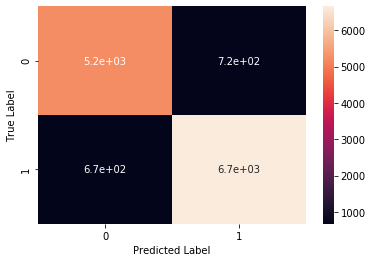

In [124]:
import seaborn as sns
sns.heatmap(cfMatrix_PR_hash, annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
#fake =0, Real =1  Yaxis = TRUE VAL  Xaxis = PRED VAL  Order = TN, FP, FN, TP

Hash-Linear Regression

In [125]:
LR_model_hash = LogisticRegression()
LR_model_hash.fit(hash_train, y_train)

C:\Users\BAASHITH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
y_pred_LR_hash = LR_model_hash.predict(hash_test)
score_LR_hash = accuracy_score(y_test, y_pred_LR_hash)

In [127]:
print(f"Accuracy Score LR_hash : {round(score_LR_hash*100,2)}%")

Accuracy Score LR_hash : 90.98%


In [128]:
cfMatrix_LR_hash = confusion_matrix(y_test, y_pred_LR_hash)
cfMatrix_LR_hash

array([[5409,  558],
       [ 642, 6689]], dtype=int64)

In [129]:
tn, fp, fn, tp = cfMatrix_LR_hash.ravel() 
tn, fp, fn, tp

(5409, 558, 642, 6689)

Text(33.0, 0.5, 'True Label')

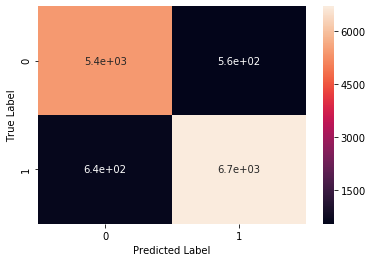

In [130]:
import seaborn as sns
sns.heatmap(cfMatrix_LR_hash, annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
#fake =0, Real =1  Yaxis = TRUE VAL  Xaxis = PRED VAL  Order = TN, FP, FN, TP

Hash-Random Forest

In [131]:
rf_model_hash = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)
rf_model_hash.fit(hash_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [132]:
y_pred_RF_hash = rf_model_hash.predict(hash_test)
score_RF_hash = accuracy_score(y_test, y_pred_RF_hash)

In [133]:
print(f"Accuracy Score RF_hash : {round(score_RF_hash*100,2)}%")

Accuracy Score RF_hash : 90.04%


In [134]:
cfMatrix_RF_hash = confusion_matrix(y_test, y_pred_RF_hash)
cfMatrix_RF_hash

array([[5321,  646],
       [ 679, 6652]], dtype=int64)

In [135]:
tn, fp, fn, tp = cfMatrix_RF_hash.ravel() 
tn, fp, fn, tp

(5321, 646, 679, 6652)

Text(33.0, 0.5, 'True Label')

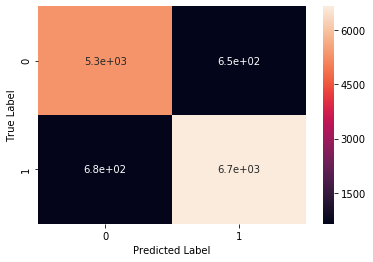

In [136]:
import seaborn as sns
sns.heatmap(cfMatrix_RF_hash, annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
#fake =0, Real =1  Yaxis = TRUE VAL  Xaxis = PRED VAL  Order = TN, FP, FN, TP

Hash-Decision Tree

In [137]:
DT_model_hash = DecisionTreeClassifier(criterion ='entropy', random_state=0)
DT_model_hash.fit(hash_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [138]:
y_pred_DT_hash = DT_model_hash.predict(hash_test)
score_DT_hash = accuracy_score(y_test, y_pred_DT_hash)

In [139]:
print(f"Accuracy Score DT_hash : {round(score_DT_hash*100,2)}%")

Accuracy Score DT_hash : 86.1%


In [140]:
cfMatrix_DT_hash = confusion_matrix(y_test, y_pred_DT_hash)
cfMatrix_DT_hash

array([[5068,  899],
       [ 949, 6382]], dtype=int64)

In [141]:
tn, fp, fn, tp = cfMatrix_DT_hash.ravel() 
tn, fp, fn, tp

(5068, 899, 949, 6382)

Text(33.0, 0.5, 'True Label')

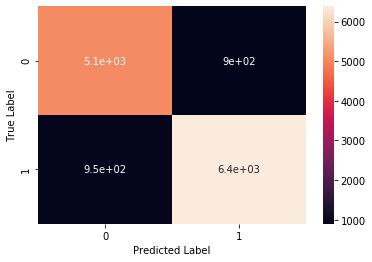

In [142]:
import seaborn as sns
sns.heatmap(cfMatrix_DT_hash, annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
#fake =0, Real =1  Yaxis = TRUE VAL  Xaxis = PRED VAL  Order = TN, FP, FN, TP

Hash-Linear SVC

In [143]:
svm_model_hash = LinearSVC()
svm_model_hash.fit(hash_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [144]:
y_pred_SVM_hash = svm_model_hash.predict(hash_test)
score_SVM_hash = accuracy_score(y_test, y_pred_SVM_hash)

In [145]:
print(f"Accuracy Score SVM_hash : {round(score_SVM_hash*100,2)}%")

Accuracy Score SVM_hash : 91.13%


In [146]:
cfMatrix_SVM_hash = confusion_matrix(y_test, y_pred_SVM_hash)
cfMatrix_SVM_hash

array([[5380,  587],
       [ 593, 6738]], dtype=int64)

In [147]:
tn, fp, fn, tp = cfMatrix_SVM_hash.ravel() 
tn, fp, fn, tp

(5380, 587, 593, 6738)

Text(33.0, 0.5, 'True Label')

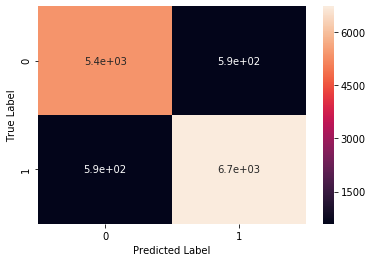

In [148]:
import seaborn as sns
sns.heatmap(cfMatrix_SVM_hash, annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
#fake =0, Real =1  Yaxis = TRUE VAL  Xaxis = PRED VAL  Order = TN, FP, FN, TP

In [149]:
print(f"Accuracy Score PR : {round(score_PR_Tf*100,2)}%")
print(f"Accuracy Score LR : {round(score_LR_Tf*100,2)}%")
print(f"Accuracy Score RF : {round(score_RF_Tf*100,2)}%")
print(f"Accuracy Score DT : {round(score_DT_Tf*100,2)}%")
print(f"Accuracy Score SVM : {round(score_SVM_Tf*100,2)}%")

Accuracy Score PR : 90.43%
Accuracy Score LR : 91.71%
Accuracy Score RF : 88.7%
Accuracy Score DT : 86.38%
Accuracy Score SVM : 92.22%


In [150]:
print(f"Accuracy Score PR_count : {round(score_PR_count*100,2)}%")
print(f"Accuracy Score LR_count : {round(score_LR_count*100,2)}%")
print(f"Accuracy Score RF_count : {round(score_RF_count*100,2)}%")
print(f"Accuracy Score DT_count : {round(score_DT_count*100,2)}%")
print(f"Accuracy Score SVM_count : {round(score_SVM_count*100,2)}%")

Accuracy Score PR_count : 89.12%
Accuracy Score LR_count : 92.03%
Accuracy Score RF_count : 89.06%
Accuracy Score DT_count : 88.69%
Accuracy Score SVM_count : 90.01%


In [151]:
print(f"Accuracy Score PR_hash : {round(score_PR_hash*100,2)}%")
print(f"Accuracy Score LR_hash : {round(score_LR_hash*100,2)}%")
print(f"Accuracy Score RF_hash : {round(score_RF_hash*100,2)}%")
print(f"Accuracy Score DT_hash : {round(score_DT_hash*100,2)}%")
print(f"Accuracy Score SVM_hash : {round(score_SVM_hash*100,2)}%")

Accuracy Score PR_hash : 89.56%
Accuracy Score LR_hash : 90.98%
Accuracy Score RF_hash : 90.04%
Accuracy Score DT_hash : 86.1%
Accuracy Score SVM_hash : 91.13%


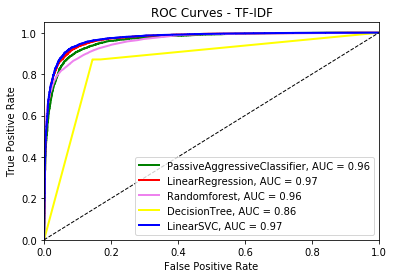

In [160]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# PassiveAggressiveClassifier (PR)
y_scores_PR_tf = pac.decision_function(tf_test)
fpr_PR_tf, tpr_PR_tf, thresholds_PR_tf = roc_curve(y_test, y_scores_PR_tf)
roc_auc_PR_tf = auc(fpr_PR_tf, tpr_PR_tf)

# LinearRegression (LR)
y_scores_LR_tf = LR_model.decision_function(tf_test)
fpr_LR_tf, tpr_LR_tf, thresholds_LR_tf = roc_curve(y_test, y_scores_LR_tf)
roc_auc_LR_tf = auc(fpr_LR_tf, tpr_LR_tf)

# Randomforest (RF)
y_scores_RF_tf = rf_model.predict_proba(tf_test)[:, 1]
fpr_RF_tf, tpr_RF_tf, thresholds_RF_tf = roc_curve(y_test, y_scores_RF_tf)
roc_auc_RF_tf = auc(fpr_RF_tf, tpr_RF_tf)

# DecisionTree (DT)
y_scores_DT_tf = DT_model.predict_proba(tf_test)[:, 1]
fpr_DT_tf, tpr_DT_tf, thresholds_DT_tf = roc_curve(y_test, y_scores_DT_tf)
roc_auc_DT_tf = auc(fpr_DT_tf, tpr_DT_tf)

# LinearSVC (SVM)
y_scores_SVM_tf = svm_model.decision_function(tf_test)
fpr_SVM_tf, tpr_SVM_tf, thresholds_SVM_tf = roc_curve(y_test, y_scores_SVM_tf)
roc_auc_SVM_tf = auc(fpr_SVM_tf, tpr_SVM_tf)

# Plotting the ROC curves
plt.figure()
plt.plot(fpr_PR_tf, tpr_PR_tf, color='green', lw=2, label='PassiveAggressiveClassifier, AUC = %0.2f' % roc_auc_PR_tf)
plt.plot(fpr_LR_tf, tpr_LR_tf, color='red', lw=2, label='LinearRegression, AUC = %0.2f' % roc_auc_LR_tf)
plt.plot(fpr_RF_tf, tpr_RF_tf, color='violet', lw=2, label='Randomforest, AUC = %0.2f' % roc_auc_RF_tf)
plt.plot(fpr_DT_tf, tpr_DT_tf, color='yellow', lw=2, label='DecisionTree, AUC = %0.2f' % roc_auc_DT_tf)
plt.plot(fpr_SVM_tf, tpr_SVM_tf, color='blue', lw=2, label='LinearSVC, AUC = %0.2f' % roc_auc_SVM_tf)
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - TF-IDF')
plt.legend(loc="lower right")
plt.show()


In [144]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


vectorizers_list = [TfidfVectorizer(stop_words = 'english', max_df=0.7), CountVectorizer(), HashingVectorizer(stop_words='english',n_features=5000)]
classifiers_list = [PassiveAggressiveClassifier(max_iter=50), LogisticRegression(), RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1), DecisionTreeClassifier(criterion ='entropy', random_state=0), LinearSVC()]
results = []

for vectorizer in vectorizers_list:
    X_train_vectorized = vectorizer.fit_transform(X_train)
    x_test_vectorized = vectorizer.transform(x_test)
    for classifier in classifiers_list:
        classifier.fit(X_train_vectorized, y_train)
        y_pred = classifier.predict(x_test_vectorized)
        accuracy = accuracy_score(y_test, y_pred)
       # precision = precision_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
       # recall = recall_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='macro')
      #  f1 = f1_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred, average='macro')
        cm = confusion_matrix(y_test, y_pred)
        results.append({
            'Vectorizer': type(vectorizer).__name__,
            'Classifier': type(classifier).__name__,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-score': f1score,
            'Confusion Matrix': cm
        })

df_results = pd.DataFrame(results)
print("\nOVERALL PERFORMANCE RESULTS:\n")
print(df_results)

grouped_results = df_results.groupby(['Vectorizer', 'Classifier'])


mean_results = grouped_results.mean()

print("\nVectorizer-Classifier GROUPBY RESULTS:\n")
print(mean_results)

best_model = df_results.iloc[df_results['F1-score'].idxmax()]

print("\nBEST MODEL:\n")
print(best_model)

print("\nBEST PERFORMANCE ALGORITHM:\n")
if best_model['Vectorizer'] == 'TfidfVectorizer':
    print('The TfidfVectorizer performs the best overall.')
elif best_model['Vectorizer'] == 'CountVectorizer':
    print('The CountVectorizer performs the best overall.')
else:
    print('The HashingVectorizer performs the best overall.')
    
    
if best_model['Classifier'] == 'PassiveAggressiveClassifier':
    print('The Passive Aggressive Classifier performs the best overall.')
elif best_model['Classifier'] == 'LogisticRegression':
    print('The LogisticRegression performs the best overall.')
elif best_model['Classifier'] == 'RandomForestClassifier':
    print('The RandomForestClassifier performs the best overall.')
elif best_model['Classifier'] == 'DecisionTreeClassifier':
    print('The DecisionTreeClassifier performs the best overall.')
else:
    print('The LinearSVC performs the best overall.')

C:\Users\BAASHITH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BAASHITH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BAASHITH\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\BAASHITH\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\BAASHITH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver t


OVERALL PERFORMANCE RESULTS:

    Accuracy                   Classifier            Confusion Matrix  \
0   0.904121  PassiveAggressiveClassifier  [[5282, 685], [590, 6741]]   
1   0.917055           LogisticRegression  [[5396, 571], [532, 6799]]   
2   0.884795       RandomForestClassifier  [[5084, 883], [649, 6682]]   
3   0.863814       DecisionTreeClassifier  [[5104, 863], [948, 6383]]   
4   0.922169                    LinearSVC  [[5415, 552], [483, 6848]]   
5   0.902918  PassiveAggressiveClassifier  [[5238, 729], [562, 6769]]   
6   0.920289           LogisticRegression  [[5460, 507], [553, 6778]]   
7   0.889683       RandomForestClassifier  [[5046, 921], [546, 6785]]   
8   0.886900       DecisionTreeClassifier  [[5233, 734], [770, 6561]]   
9   0.899684                    LinearSVC  [[5293, 674], [660, 6671]]   
10  0.896601  PassiveAggressiveClassifier  [[5307, 660], [715, 6616]]   
11  0.909761           LogisticRegression  [[5409, 558], [642, 6689]]   
12  0.900662       R

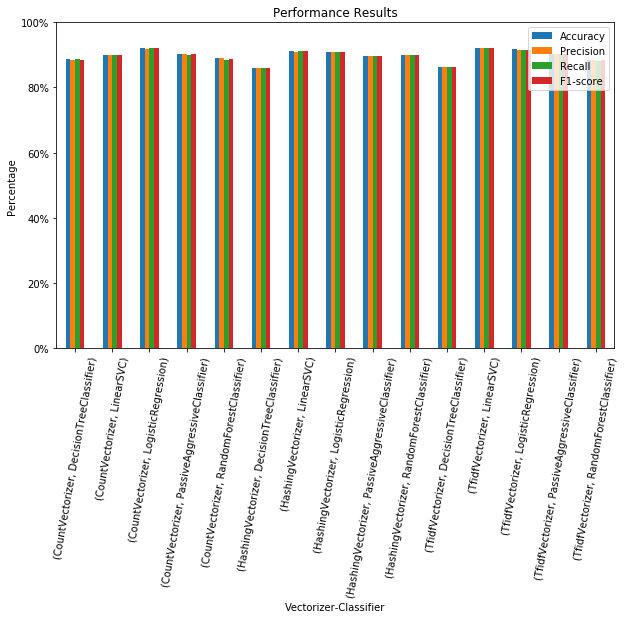

In [147]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def percentage(x, pos):
    return '{:.0%}'.format(x)

graph = mean_results.plot(kind='bar', y=['Accuracy', 'Precision', 'Recall', 'F1-score'], ylim=(0, 1), rot=800, figsize=(10, 6))


formatter = FuncFormatter(percentage)

graph.yaxis.set_major_formatter(formatter)

graph.set_xlabel('Vectorizer-Classifier')
graph.set_ylabel('Percentage')
graph.set_title('Performance Results')
plt.show()


Pickiling the Model

In [145]:
import pickle
filename = 'bin_finalized_model_SVM.pkl'
pickle.dump(svm_model, open(filename,'wb'))

In [146]:
filename = 'bin_vectorizer_TF_IDF.pkl'
pickle.dump(vector, open(filename,'wb'))